In [49]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from warnings import filterwarnings

filterwarnings('ignore')

In [50]:
def scatter_plot_regression(X, Y, Y_hat):
    data = pd.DataFrame({'x': X, 'y': Y, 'y_hat': Y_hat})
    sns.scatterplot(data=data, x='x', y='y', alpha=.5)

    sns.lineplot(data=data, x='x', y='y_hat', color='red', linewidth=1)

    plt.axvline(x=0, color='black', linestyle='--', alpha=.5)
    plt.axhline(y=0, color='black', linestyle='--', alpha=.5)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Regression Plot of Y vs X')
    # plt.legend().remove()

    plt.show()

In [43]:
def distribution_plot(data, title):
    sns.histplot(data, kde=True)
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

## Citadel Securities QR Interview Problem

### Setup

You have a set of points (X, Y) ~ N(0, 1) with Cov(X, Y) = p, we want to do a OLS 
regression of Y on X and estimate the slope. 

Then we want to do a hypothesis test for the slope using a bootstrap estimate of the 
distribution of the slope under the null hypothesis that the slope is 0.

In [57]:
p = 0.075
n_points = 1000
X, Y = np.random.multivariate_normal(mean=[0, 0], cov=[[1, p], [p, 1]], size=n_points).T

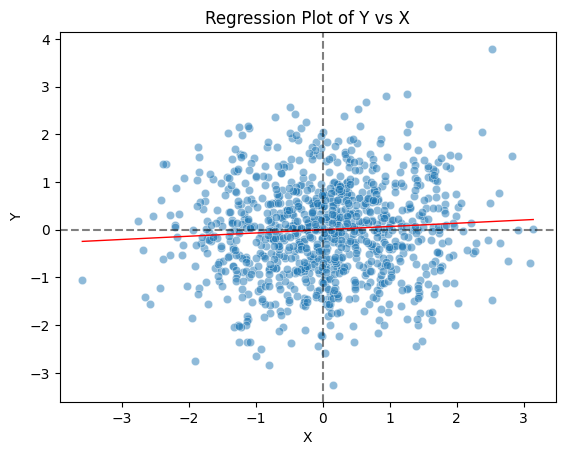

Estimated slope: 0.06804643271033807


In [58]:
ols = LinearRegression(fit_intercept=False)
ols.fit(X.reshape(-1, 1), Y)
Y_hat = ols.predict(X.reshape(-1, 1))

scatter_plot_regression(X, Y, Y_hat)

beta = ols.coef_[0]
print(f"Estimated slope: {beta}")

Bootstrap estimate of the slope: 0.00079509846833094


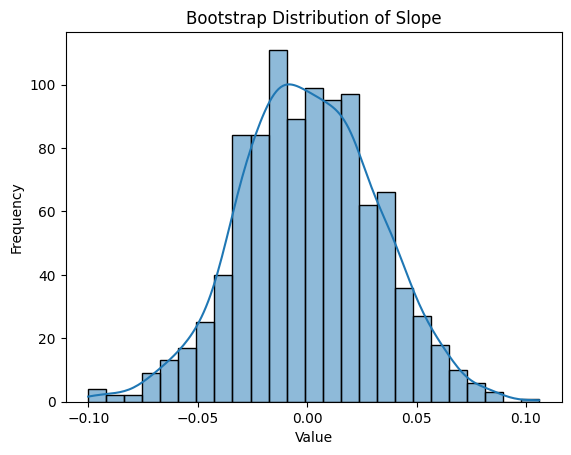

In [59]:
beta_boostrap = []
n_samples = 1000 
for _ in range(n_samples):
    _X, _Y = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0], [0, 1]], size=n_points).T
    _ols = LinearRegression(fit_intercept=False)
    _ols.fit(_X.reshape(-1, 1), _Y)
    beta_boostrap.append(_ols.coef_[0])

beta_boostrap = np.array(beta_boostrap)
print(f"Bootstrap estimate of the slope: {beta_boostrap.mean()}")
distribution_plot(beta_boostrap, "Bootstrap Distribution of Slope")

In [60]:
def empirical_p_value(data, beta):
    return np.sum(data >= beta) / len(data)

p_value = empirical_p_value(beta_boostrap, beta)
print(f"Empirical p-value: {p_value}")

Empirical p-value: 0.01
